# Import the required libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Send a request to the website on which you need to do web scrapping

In [2]:
url = "https://www.iplt20.com/auction"

In [3]:
r = requests.get(url)
print(r)

<Response [200]>


# Perform web scrapping

In [4]:
soup = BeautifulSoup(r.text,"lxml")
print(soup)

<!DOCTYPE html>
<html lang="en">
<head>
<script>
    var title = "IPL Auction";
    window.dataLayer = window.dataLayer || [];
    window.dataLayer.push({
        'client_ga_id': '308089989',
        'content_type': title,
        'platform_type': 'web',
        'environment': 'production',
    });
</script>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-PQ2QKF4');</script>
<!-- End Google Tag Manager -->
<title data-page-title="IPL Auction" id="page_title">IPL Auction</title>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="o4L0DXbJcGuoltWRw7hUXBTnDWKRe17A

In [5]:
table = soup.find("table", class_ ="ih-td-tab auction-tbl")
print(table)

<table class="ih-td-tab auction-tbl" id="t3" width="100%">
<thead>
<tr class="ih-pt-tbl" style="display:revert">
<th class="skip-filter" style="width:25%;text-align: left;">TEAM</th>
<th class="skip-filter" style="width:25%;">FUNDS REMAINING</th>
<th class="skip-filter" style="width:25%;">OVERSEAS PLAYERS </th>
<th class="skip-filter" style="width:25%;">TOTAL PLAYERS</th>
</tr>
<thead>
</thead></thead><tbody id="pointsdata">
<tr>
<td class="ih-t-color">
<div class="ih-pt-ic">
<div class="ih-pt-img" style="width: 60px">
<img alt="" src="https://bcciplayerimages.s3.ap-south-1.amazonaws.com/ipl/franchises/1702465555_CSKroundbig.png"/>
</div>
<h2 class="ih-pt-cont">Chennai Super Kings</h2>
</div>
</td>
<td>₹1,00,00,000</td>
<td>8</td>
<td>25</td>
</tr>
<tr>
<td class="ih-t-color">
<div class="ih-pt-ic">
<div class="ih-pt-img" style="width: 60px">
<img alt="" src="https://bcciplayerimages.s3.ap-south-1.amazonaws.com/ipl/franchises/1702465727_DCroundbig.png"/>
</div>
<h2 class="ih-pt-cont">D

In [6]:
title = table.find_all("th")
print(title)

[<th class="skip-filter" style="width:25%;text-align: left;">TEAM</th>, <th class="skip-filter" style="width:25%;">FUNDS REMAINING</th>, <th class="skip-filter" style="width:25%;">OVERSEAS PLAYERS </th>, <th class="skip-filter" style="width:25%;">TOTAL PLAYERS</th>]


In [7]:
header = []

In [8]:
for i in title:
    name = i.text
    header.append(name)    

In [9]:
print(header)

['TEAM', 'FUNDS REMAINING', 'OVERSEAS PLAYERS ', 'TOTAL PLAYERS']


In [10]:
df = pd.DataFrame(columns = header)
print(df)

Empty DataFrame
Columns: [TEAM, FUNDS REMAINING, OVERSEAS PLAYERS , TOTAL PLAYERS]
Index: []


In [11]:
rows = table.find_all("tr")
print(rows)

[<tr class="ih-pt-tbl" style="display:revert">
<th class="skip-filter" style="width:25%;text-align: left;">TEAM</th>
<th class="skip-filter" style="width:25%;">FUNDS REMAINING</th>
<th class="skip-filter" style="width:25%;">OVERSEAS PLAYERS </th>
<th class="skip-filter" style="width:25%;">TOTAL PLAYERS</th>
</tr>, <tr>
<td class="ih-t-color">
<div class="ih-pt-ic">
<div class="ih-pt-img" style="width: 60px">
<img alt="" src="https://bcciplayerimages.s3.ap-south-1.amazonaws.com/ipl/franchises/1702465555_CSKroundbig.png"/>
</div>
<h2 class="ih-pt-cont">Chennai Super Kings</h2>
</div>
</td>
<td>₹1,00,00,000</td>
<td>8</td>
<td>25</td>
</tr>, <tr>
<td class="ih-t-color">
<div class="ih-pt-ic">
<div class="ih-pt-img" style="width: 60px">
<img alt="" src="https://bcciplayerimages.s3.ap-south-1.amazonaws.com/ipl/franchises/1702465727_DCroundbig.png"/>
</div>
<h2 class="ih-pt-cont">Delhi Capitals</h2>
</div>
</td>
<td>₹9,90,00,000</td>
<td>8</td>
<td>25</td>
</tr>, <tr>
<td class="ih-t-color">

In [12]:
for i in rows[1:]:
    data = i.find_all("td")    
    print(data)

[<td class="ih-t-color">
<div class="ih-pt-ic">
<div class="ih-pt-img" style="width: 60px">
<img alt="" src="https://bcciplayerimages.s3.ap-south-1.amazonaws.com/ipl/franchises/1702465555_CSKroundbig.png"/>
</div>
<h2 class="ih-pt-cont">Chennai Super Kings</h2>
</div>
</td>, <td>₹1,00,00,000</td>, <td>8</td>, <td>25</td>]
[<td class="ih-t-color">
<div class="ih-pt-ic">
<div class="ih-pt-img" style="width: 60px">
<img alt="" src="https://bcciplayerimages.s3.ap-south-1.amazonaws.com/ipl/franchises/1702465727_DCroundbig.png"/>
</div>
<h2 class="ih-pt-cont">Delhi Capitals</h2>
</div>
</td>, <td>₹9,90,00,000</td>, <td>8</td>, <td>25</td>]
[<td class="ih-t-color">
<div class="ih-pt-ic">
<div class="ih-pt-img" style="width: 60px">
<img alt="" src="https://bcciplayerimages.s3.ap-south-1.amazonaws.com/ipl/franchises/1702465836_GTroundbig.png"/>
</div>
<h2 class="ih-pt-cont">Gujarat Titans</h2>
</div>
</td>, <td>₹7,85,00,000</td>, <td>8</td>, <td>25</td>]
[<td class="ih-t-color">
<div class="ih-

In [13]:
for i in rows[1:]:
    data = i.find_all("td")    
    row = [tr.text for tr in data]
    print(row)

['\n\n\n\n\nChennai Super Kings\n\n', '₹1,00,00,000', '8', '25']
['\n\n\n\n\nDelhi Capitals\n\n', '₹9,90,00,000', '8', '25']
['\n\n\n\n\nGujarat Titans\n\n', '₹7,85,00,000', '8', '25']
['\n\n\n\n\nKolkata Knight Riders\n\n', '₹1,35,00,000', '8', '23']
['\n\n\n\n\nLucknow Super Giants\n\n', '₹95,00,000', '8', '25']
['\n\n\n\n\nMumbai Indians\n\n', '₹1,05,00,000', '8', '25']
['\n\n\n\n\nPunjab Kings\n\n', '₹4,15,00,000', '8', '25']
['\n\n\n\n\nRajasthan Royals\n\n', '₹20,00,000', '8', '22']
['\n\n\n\n\nRoyal Challengers Bengaluru\n\n', '₹2,85,00,000', '8', '25']
['\n\n\n\n\nSunrisers Hyderabad\n\n', '₹3,20,00,000', '8', '25']


In [14]:
for i in rows[1:]:
    first_td = i.find_all("td")[0].find("div" , class_ = "ih-pt-ic").text.strip()
    data = i.find_all("td")[1:]
    row = [tr.text for tr in data]
    row.insert(0,first_td)
    l = len(df) 
    df.loc[l] = row
    

In [15]:
print(df)

                          TEAM FUNDS REMAINING OVERSEAS PLAYERS  TOTAL PLAYERS
0          Chennai Super Kings    ₹1,00,00,000                 8            25
1               Delhi Capitals    ₹9,90,00,000                 8            25
2               Gujarat Titans    ₹7,85,00,000                 8            25
3        Kolkata Knight Riders    ₹1,35,00,000                 8            23
4         Lucknow Super Giants      ₹95,00,000                 8            25
5               Mumbai Indians    ₹1,05,00,000                 8            25
6                 Punjab Kings    ₹4,15,00,000                 8            25
7             Rajasthan Royals      ₹20,00,000                 8            22
8  Royal Challengers Bengaluru    ₹2,85,00,000                 8            25
9          Sunrisers Hyderabad    ₹3,20,00,000                 8            25


# Convert the dataframe to a csv file

In [16]:
df.to_csv("ipl_2024_Auction_Stats.csv")

#  Perform exploratory data analysis

In [17]:
ds = pd.read_csv("ipl_2024_Auction_Stats.csv")

In [18]:
ds.head()

,Unnamed: 0,TEAM,FUNDS REMAINING,OVERSEAS PLAYERS,TOTAL PLAYERS
0,0,Chennai Super Kings,"₹1,00,00,000",8,25
1,1,Delhi Capitals,"₹9,90,00,000",8,25
2,2,Gujarat Titans,"₹7,85,00,000",8,25
3,3,Kolkata Knight Riders,"₹1,35,00,000",8,23
4,4,Lucknow Super Giants,"₹95,00,000",8,25


In [19]:
ds = ds.drop(columns=['Unnamed: 0'])

In [20]:
ds.head()

,TEAM,FUNDS REMAINING,OVERSEAS PLAYERS,TOTAL PLAYERS
0,Chennai Super Kings,"₹1,00,00,000",8,25
1,Delhi Capitals,"₹9,90,00,000",8,25
2,Gujarat Titans,"₹7,85,00,000",8,25
3,Kolkata Knight Riders,"₹1,35,00,000",8,23
4,Lucknow Super Giants,"₹95,00,000",8,25


In [21]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   TEAM               10 non-null     object
 1   FUNDS REMAINING    10 non-null     object
 2   OVERSEAS PLAYERS   10 non-null     int64 
 3   TOTAL PLAYERS      10 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [22]:
ds['FUNDS REMAINING'] = ds['FUNDS REMAINING'].str[1:]

In [23]:
ds.head()

,TEAM,FUNDS REMAINING,OVERSEAS PLAYERS,TOTAL PLAYERS
0,Chennai Super Kings,"1,00,00,000",8,25
1,Delhi Capitals,"9,90,00,000",8,25
2,Gujarat Titans,"7,85,00,000",8,25
3,Kolkata Knight Riders,"1,35,00,000",8,23
4,Lucknow Super Giants,"95,00,000",8,25


In [24]:
ds['FUNDS REMAINING'] = ds['FUNDS REMAINING'].str.replace(",", "")

In [25]:
ds.head()

,TEAM,FUNDS REMAINING,OVERSEAS PLAYERS,TOTAL PLAYERS
0,Chennai Super Kings,10000000,8,25
1,Delhi Capitals,99000000,8,25
2,Gujarat Titans,78500000,8,25
3,Kolkata Knight Riders,13500000,8,23
4,Lucknow Super Giants,9500000,8,25


In [26]:
ds['FUNDS REMAINING'] = ds['FUNDS REMAINING'].astype(int)

In [27]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   TEAM               10 non-null     object
 1   FUNDS REMAINING    10 non-null     int32 
 2   OVERSEAS PLAYERS   10 non-null     int64 
 3   TOTAL PLAYERS      10 non-null     int64 
dtypes: int32(1), int64(2), object(1)
memory usage: 408.0+ bytes


In [28]:
ds.describe()

,FUNDS REMAINING,OVERSEAS PLAYERS,TOTAL PLAYERS
count,1.000000e+01,10.0,10.000000
mean,3.250000e+07,8.0,24.500000
std,3.239684e+07,0.0,1.080123
min,2.000000e+06,8.0,22.000000
25%,1.012500e+07,8.0,25.000000
50%,2.100000e+07,8.0,25.000000
75%,3.912500e+07,8.0,25.000000
max,9.900000e+07,8.0,25.000000


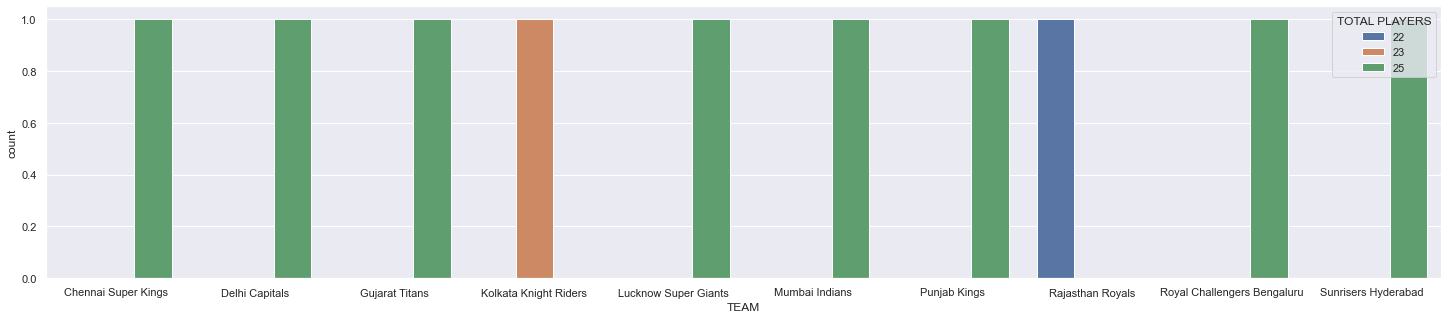

In [29]:
sns.set(rc={'figure.figsize':(25,5)})
sns.countplot(x='TEAM',hue='TOTAL PLAYERS',data=ds)
plt.show()

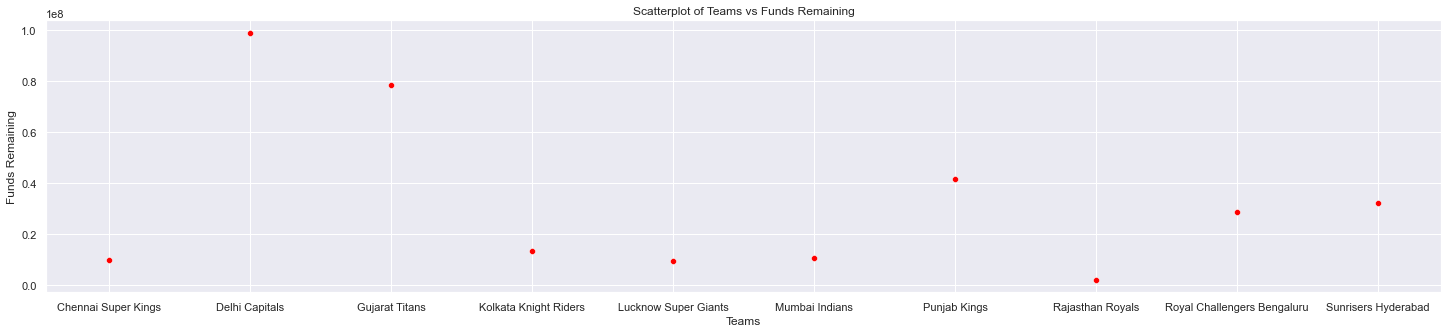

In [30]:
plt.figure(figsize=(25, 5))
sns.scatterplot(data=ds, x='TEAM', y='FUNDS REMAINING',color='red')
plt.title('Scatterplot of Teams vs Funds Remaining')
plt.xlabel('Teams')
plt.ylabel('Funds Remaining')
plt.show()